Project: Predicting House Prices

Objective:
The objective of this project is to build a machine learning model that can predict house prices based on various features.

Dataset:
You will be provided with a dataset containing information about houses, including features such as the number of bedrooms, bathrooms, square footage, location, etc. The dataset also includes the corresponding sale prices of the houses.

Tasks:
Load the dataset into a Pandas DataFrame.
Explore the data to understand its structure, check for missing values, and perform any necessary data cleaning.
Perform exploratory data analysis (EDA) to gain insights into the relationships between different features and the target variable (house prices).
Preprocess the data by handling categorical variables (e.g., one-hot encoding) and scaling numerical features if necessary.
Split the dataset into training and testing sets.
Choose a machine learning algorithm (e.g., linear regression, decision tree, random forest) and train a model using the training data.
Evaluate the performance of the trained model using appropriate evaluation metrics (e.g., mean squared error, R-squared).
Tune the hyperparameters of the model to improve its performance (e.g., using cross-validation).
Test the final model using the testing data and assess its performance.
Optionally, visualize the predictions versus the actual prices to understand the model's behavior.

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/svetlin/Downloads/American_Housing_Data_20231209.csv')

In [49]:
df.head(10)


,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
1,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
2,10014,1650000.0,1,1,718,140 CHARLES ST APT 4D,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
3,10014,760000.0,3,2,1538,38 JONES ST,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
4,10014,1100000.0,1,1,600,81 BEDFORD ST APT 3F,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
5,10017,764900.0,1,1,643,145 E 48TH ST APT 11E,New York,New York,15514,20107.7,New York,188289.0,40.75235,-73.97260
6,10021,2499000.0,2,2,1471,234 E 70TH ST APT 4,New York,New York,42484,46004.0,New York,261254.0,40.76963,-73.95899
7,10022,4580000.0,2,3,1800,641 5TH AVE # 29D,New York,New York,33303,28998.9,New York,281977.0,40.75856,-73.96787
8,10026,540000.0,2,1,750,45 CENTRAL PARK N # 4D,New York,New York,39401,39689.7,New York,117438.0,40.80302,-73.95348
9,10026,570000.0,1,1,589,300 W 110TH ST APT 19H,New York,New York,39401,39689.7,New York,117438.0,40.80302,-73.95348


In [50]:
df.isnull().values.any()

True

In [51]:
df.isnull().sum()

Zip Code                   0
Price                      0
Beds                       0
Baths                      0
Living Space               0
Address                    0
City                       0
State                      0
Zip Code Population        0
Zip Code Density           0
County                     0
Median Household Income    2
Latitude                   0
Longitude                  0
dtype: int64

In [52]:
df.dtypes

Zip Code                     int64
Price                      float64
Beds                         int64
Baths                        int64
Living Space                 int64
Address                     object
City                        object
State                       object
Zip Code Population          int64
Zip Code Density           float64
County                      object
Median Household Income    float64
Latitude                   float64
Longitude                  float64
dtype: object

In [53]:
df2 = df.dropna()

In [54]:
df2.isnull().sum()

Zip Code                   0
Price                      0
Beds                       0
Baths                      0
Living Space               0
Address                    0
City                       0
State                      0
Zip Code Population        0
Zip Code Density           0
County                     0
Median Household Income    0
Latitude                   0
Longitude                  0
dtype: int64

In [55]:
df2.describe()

,Zip Code,Price,Beds,Baths,Living Space,Zip Code Population,Zip Code Density,Median Household Income,Latitude,Longitude
count,39979.000000,3.997900e+04,39979.000000,39979.00000,39979.000000,39979.000000,39979.000000,39979.000000,39979.000000,39979.000000
mean,64832.585632,6.227826e+05,3.171615,2.46652,1901.505090,37728.089297,2379.531517,110837.259861,36.435546,-98.080246
std,25614.988511,9.470026e+05,1.308752,1.32305,1211.321442,18671.207769,2946.600433,47309.055715,4.446940,15.061450
min,10013.000000,1.800000e+03,1.000000,1.00000,2.000000,39.000000,0.600000,27475.000000,25.729830,-122.826870
25%,40215.000000,2.650000e+05,3.000000,2.00000,1200.000000,24465.000000,902.400000,76640.000000,33.239850,-111.636310
50%,74136.000000,3.999000e+05,3.000000,2.00000,1639.000000,35049.000000,1588.700000,100405.000000,36.166620,-96.839530
75%,85730.000000,6.749900e+05,4.000000,3.00000,2265.000000,46835.000000,2736.800000,135075.000000,39.283090,-85.656980
max,98199.000000,3.800000e+07,54.000000,66.00000,74340.000000,116469.000000,58289.600000,900203.000000,47.742370,-73.704510


In [56]:
df2.value_counts()

Zip Code  Price      Beds  Baths  Living Space  Address                      City        State       Zip Code Population  Zip Code Density  County       Median Household Income  Latitude  Longitude 
90804     765000.0   3     2      1489          1734 N STANTON PL            Long Beach  California  37953                6787.4            Los Angeles  80314.0                  33.78223  -118.14917    16
90810     699000.0   8     5      5164          1501 W 19TH ST               Long Beach  California  37451                2211.1            Los Angeles  91053.0                  33.81912  -118.22096    16
90805     449000.0   3     2      1069          5535 ACKERFIELD AVE UNIT 26  Long Beach  California  96840                5039.9            Los Angeles  81030.0                  33.86494  -118.18051    16
90803     3749000.0  5     5      5357          30 SAVONA WALK               Long Beach  California  32631                3099.7            Los Angeles  141826.0                 33.76162

In [57]:
df2['PriceM'] = df2['Price'] / 1000000

/var/folders/g4/jj2dn9nd72s2z5nx10h7pv7h0000gn/T/ipykernel_25988/2732090012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['PriceM'] = df2['Price'] / 1000000


Text(0.5, 1.0, 'Scatter Plot: Price vs. Baths with Smoothed Line')

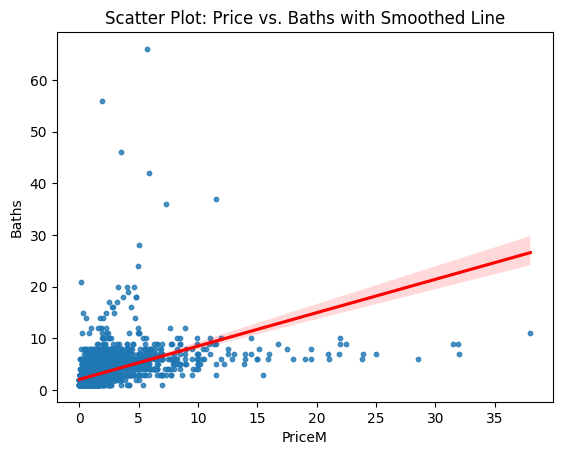

In [58]:


sns.regplot(x=df2['PriceM'], y=df2['Baths'], data=df2, scatter_kws={"s": 10}, line_kws={"color": "red"})


plt.xlabel('PriceM')
plt.ylabel('Baths')
plt.title('Scatter Plot: Price vs. Baths with Smoothed Line')




Text(0.5, 1.0, 'Scatter Plot: Price vs. Beds with Smoothed Line')

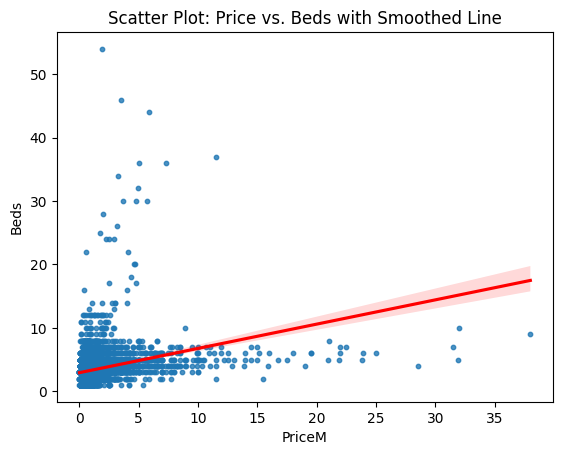

In [59]:



sns.regplot(x=df2['PriceM'], y=df2['Beds'], data=df2, scatter_kws={"s": 10}, line_kws={"color": "red"})


plt.xlabel('PriceM')
plt.ylabel('Beds')
plt.title('Scatter Plot: Price vs. Beds with Smoothed Line')

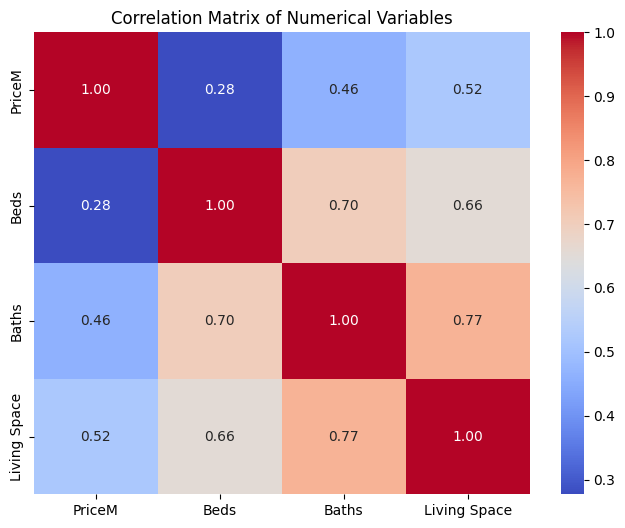

In [60]:
numerical_cols = ['PriceM', 'Beds', 'Baths', 'Living Space']

# Calculate the correlation matrix
correlation_matrix = df2[numerical_cols].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

In [61]:
df2=pd.get_dummies(df2, columns=['State'], prefix='State')

In [62]:
df2.head(5)

,Zip Code,Price,Beds,Baths,Living Space,Address,City,Zip Code Population,Zip Code Density,County,...,State_North Carolina,State_Ohio,State_Oklahoma,State_Oregon,State_Pennsylvania,State_Tennessee,State_Texas,State_Virginia,State_Washington,State_Wisconsin
0,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,29563,20967.9,New York,...,False,False,False,False,False,False,False,False,False,False
1,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,29563,20967.9,New York,...,False,False,False,False,False,False,False,False,False,False
2,10014,1650000.0,1,1,718,140 CHARLES ST APT 4D,New York,29815,23740.9,New York,...,False,False,False,False,False,False,False,False,False,False
3,10014,760000.0,3,2,1538,38 JONES ST,New York,29815,23740.9,New York,...,False,False,False,False,False,False,False,False,False,False
4,10014,1100000.0,1,1,600,81 BEDFORD ST APT 3F,New York,29815,23740.9,New York,...,False,False,False,False,False,False,False,False,False,False


In [63]:
from sklearn.preprocessing import LabelEncoder

In [64]:
label_encoder = LabelEncoder()

# Apply label encoding to the 'City' column
df2['City_LabelEncoded'] = label_encoder.fit_transform(df2['City'])

In [65]:
df2.head(-10)

,Zip Code,Price,Beds,Baths,Living Space,Address,City,Zip Code Population,Zip Code Density,County,...,State_Ohio,State_Oklahoma,State_Oregon,State_Pennsylvania,State_Tennessee,State_Texas,State_Virginia,State_Washington,State_Wisconsin,City_LabelEncoded
0,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,29563,20967.9,New York,...,False,False,False,False,False,False,False,False,False,150
1,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,29563,20967.9,New York,...,False,False,False,False,False,False,False,False,False,150
2,10014,1650000.0,1,1,718,140 CHARLES ST APT 4D,New York,29815,23740.9,New York,...,False,False,False,False,False,False,False,False,False,150
3,10014,760000.0,3,2,1538,38 JONES ST,New York,29815,23740.9,New York,...,False,False,False,False,False,False,False,False,False,150
4,10014,1100000.0,1,1,600,81 BEDFORD ST APT 3F,New York,29815,23740.9,New York,...,False,False,False,False,False,False,False,False,False,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39966,98199,1397000.0,3,3,2300,2616 31ST AVE W,Seattle,22890,2086.8,King,...,False,False,False,False,False,False,False,True,False,204
39967,98199,1395000.0,3,2,2630,2550 WESTMONT WAY W,Seattle,22890,2086.8,King,...,False,False,False,False,False,False,False,True,False,204
39968,98199,825000.0,2,1,1950,2429 W BOSTON ST,Seattle,22890,2086.8,King,...,False,False,False,False,False,False,False,True,False,204
39969,98199,1725000.0,4,4,2429,2619 34TH AVE W,Seattle,22890,2086.8,King,...,False,False,False,False,False,False,False,True,False,204


In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X = df2[['Beds', 'Baths', 'Living Space']]
y = df2['PriceM']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (31983, 3) (31983,)
Testing set shape: (7996, 3) (7996,)


In [68]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()


In [69]:
model.fit(X_train, y_train)

LinearRegression()

In [70]:
y_pred = model.predict(X_test)

In [73]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.7755536198340132
R-squared: 0.2920927596637295


In [75]:
testing_data = X_test.copy()
testing_data['Actual Price'] = y_test
testing_data['Predicted Price'] = y_pred

print(testing_data.head(-10))

       Beds  Baths  Living Space  Actual Price  Predicted Price
7602      3      3          2180      1.590000         0.845052
9287      3      2          1200      0.249900         0.321980
37273     2      2          1536      0.305000         0.568857
33060     2      1           955      0.875000         0.172222
22916     3      2          1339      0.179000         0.366027
...     ...    ...           ...           ...              ...
14427     4      3          2723      0.460000         0.876718
7714      5      3          3072      2.499999         0.846908
30776     4      3          2262      0.459999         0.730633
4107      4      4          4068      1.865000         1.515453
11224     3      2          1245      0.210000         0.336240

[7986 rows x 5 columns]
